In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
df=pd.read_csv('temp_glob')
pd.read_csv('temp_glob')


,YEAR,TEMP
0,1900,2.73530
1,1901,2.85845
2,1902,2.78148
3,1903,2.85732
4,1904,2.82464
...,...,...
113,2013,3.86149
114,2014,3.81942
115,2015,4.17442
116,2016,4.05367


/tmp/ipykernel_95469/338776018.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(x1, y1, 'bo', label='air temp',marker = 'x',color='#87A96B',markersize=8)
/tmp/ipykernel_95469/338776018.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(x1, y1, 'bo', label='air temp',marker = 'x',color='#87A96B',markersize=8)
/tmp/ipykernel_95469/338776018.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  axs[1].plot(x1, const_func(x1, *popt), 'r-', label='fit cost: a=%5.3f'  % tuple(popt),color='#0F52BA',lw=2.5)
/tmp/ipykernel_95469/338776018.py:43: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fm

Chi quadrato = 0.0010
Power_divergenceResult(statistic=0.04044682398587987, pvalue=1.0)
Chi quadrato = 0.0019
Power_divergenceResult(statistic=0.8642417591026286, pvalue=1.0)


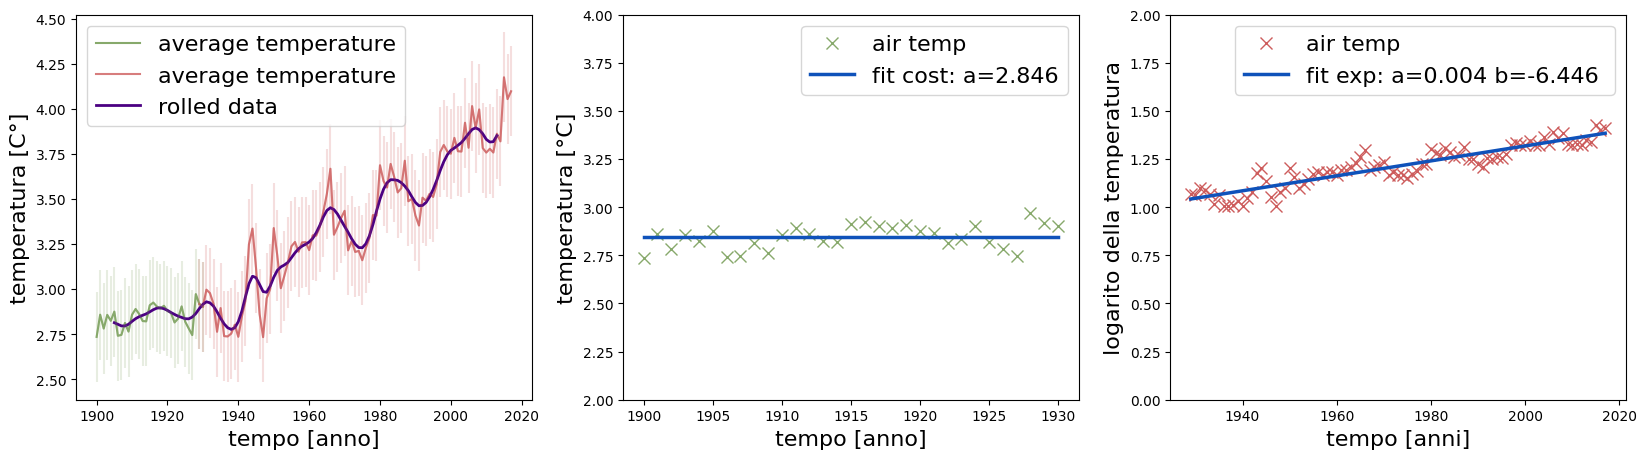

In [3]:
x=df['YEAR']
y=df['TEMP']
x1=df['YEAR'].iloc[list(range(0,31))]
y1=df['TEMP'].iloc[list(range(0,31))]
x2=df['YEAR'].iloc[list(range(29,118))]
y2=df['TEMP'].iloc[list(range(29,118))]
y2_lg=np.log(y2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
def const_func(x, a):
    return np.ones_like(x) * a
popt, pcov = curve_fit(const_func, x1, y1)

y_err=0.25
axs[0].plot(x1,y1,color='#87A96B',label='average temperature')
axs[0].errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
axs[0].plot(x2,y2,color='#CD5C5C',alpha=0.8,label='average temperature')
axs[0].errorbar(x2, y2, yerr=y_err, color='#CD5C5C',alpha=0.2)
axs[0].plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='#4B0082', label='rolled data',lw=2)
axs[0].set_xlabel('tempo [anno]',fontsize='16')
axs[0].set_ylabel('temperatura [C°]',fontsize='16')

axs[0].legend(fontsize='16')

axs[1].plot(x1, y1, 'bo', label='air temp',marker = 'x',color='#87A96B',markersize=8)
axs[1].plot(x1, const_func(x1, *popt), 'r-', label='fit cost: a=%5.3f'  % tuple(popt),color='#0F52BA',lw=2.5)
axs[1].set_ylim(2,4)
axs[1].legend(fontsize='16')
axs[1].set_xlabel('tempo [anno]',fontsize='16')
axs[1].set_ylabel('temperatura [°C]',fontsize='16')

yfit = const_func(x1, *popt)
residuals = y1 - yfit
chi_squared = np.sum(residuals**2) / (len(y) - 1)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y1))



def linear_func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(linear_func, x2, y2_lg)
axs[2].plot(x2,y2_lg, 'bo', label='air temp', marker='x',color='#CD5C5C',markersize=8)
axs[2].plot(x2, linear_func(x2,*popt), 'r-', label='fit exp: a=%5.3f b=%5.3f ' % tuple(popt),color='#0F52BA',lw=2.5)
#plt.yscale("log")
axs[2].legend(fontsize='16')
axs[2].set_ylim(0,2)
axs[2].set_xlabel('tempo [anni]',fontsize='16')
axs[2].set_ylabel('logarito della temperatura',fontsize='16')
yfit = linear_func(x2, *popt)
residuals = y2_lg - yfit
chi_squared = np.sum(residuals**2) / (len(y2_lg) - 2)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y2_lg))
plt.savefig('fig_temp1.pdf', format='pdf')


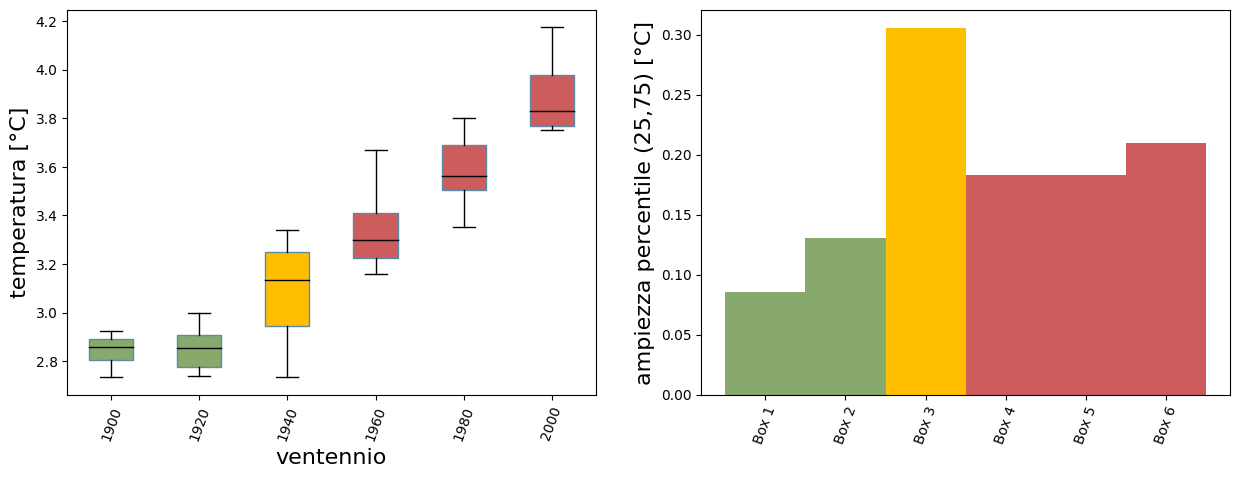

In [4]:
a=df['TEMP']
c = [1,2,3,4,5,6]
subsets = [a[i:i+20] for i in range(0, len(a), 20)]
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
box=ax[0].boxplot(subsets,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True)
plt.setp(box['boxes'], color='#5D8AA8')
ax[0].set_xlabel('ventennio',fontsize='16')
ax[0].set_ylabel('temperatura [°C]',fontsize='16')
etichette = ['1900', '1920', '1940','1960', '1980', '2000']
ax[0].set_xticks(c,etichette,rotation=70)

box_colors = ['#87A96B', '#87A96B','#FFBF00','#CD5C5C','#CD5C5C','#CD5C5C']
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)


percentiles = [np.percentile(d, [25, 50, 75]) for d in subsets]
percentile_lengths = [(p[2]-p[0]) for p in percentiles]
x_indexes = np.arange(len(percentile_lengths))
ax[1].set_ylabel('ampiezza percentile (25,75) [°C]',fontsize='16')
ax[1].bar(x_indexes, percentile_lengths, width=1, color=box_colors)
ax[1].set_xticks(x_indexes,etichette,rotation=70)
ax[1].set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths))])
plt.savefig('fig_temp2.pdf', format='pdf')



BOXPLOT

In [5]:
import pandas as pd
import numpy as np
from dowhy import CausalModel

# Let's create a sample dataset with two variables, X and Y
df = pd.DataFrame({'X': np.random.normal(0, 1, 1000), 
                   'Y': np.random.normal(0, 1, 1000)})

# Let's create a causal model with X as the cause and Y as the effect
model = dowhy.Model(data=df,
                    treatment='X',
                    outcome='Y',
                    common_causes=['Z'])

# Let's estimate the causal effect of X on Y using the do-calculus
causal_estimate = model.identify_effect(proceed_when_unidentifiable=True).estimate_effect()

# Print the causal effect estimate
print(causal_estimate)


/home/andrea/Scrivania/DC2/dowhy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'dowhy' is not defined